<a href="https://colab.research.google.com/github/wmsgur8679/BigData/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%A4%91%EA%B0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import plotly.express as px
import glob
import numpy as np
from google.colab import drive #구글드라이브 파일 연동
drive.mount('/content/drive')
!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

#font = fm.FontProperties(fname=fontpath, size=9)

#fm._rebuild()



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설




Mounted at /content/drive


# `교통사고 유형 통계`

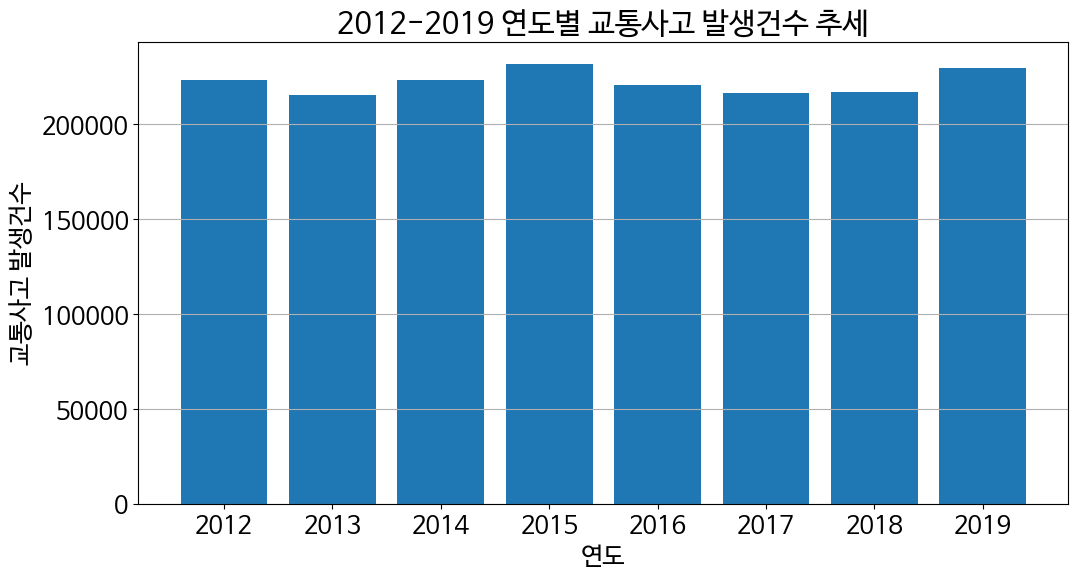

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
dataframes = []  # 각 연도별 데이터프레임이 저장된 리스트
years = range(2012, 2020)

for year in years:
    file_path = f'/content/drive/MyDrive/교통사고유형/사고{year}.csv'
    df = pd.read_csv(file_path, encoding='cp949')
    dataframes.append(df)

plt.figure(figsize=(12, 6))

years = [str(year) for year in years]  # 연도를 문자열로 변환

total_accidents = [df['사고건수'].sum() for df in dataframes]

plt.bar(years, total_accidents)

plt.xlabel('연도')
plt.ylabel('교통사고 발생건수')
plt.title('2012-2019 연도별 교통사고 발생건수 추세')
plt.grid(axis='y')  # y축에만 그리드 표시

plt.show()


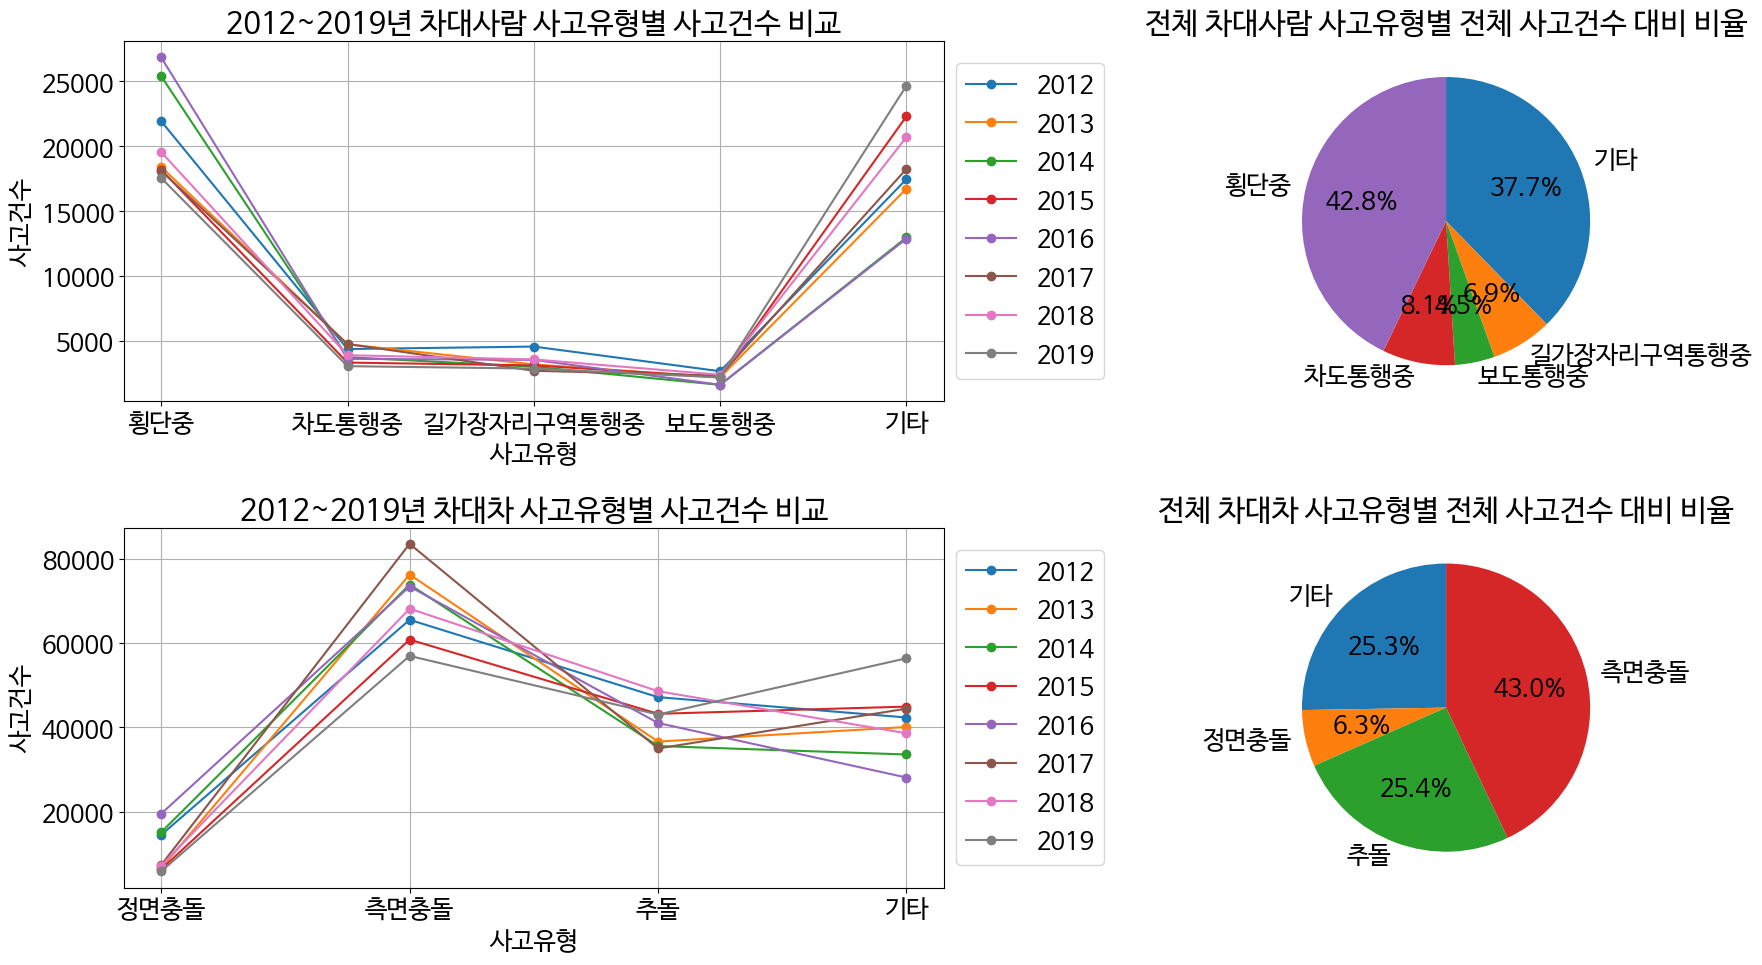

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


# CSV 파일 경로 설정
csv_dir = '/content/drive/MyDrive/교통사고유형/'

# 파일 패턴 설정
file_pattern = '사고20*.csv'  # 2012부터 2020까지 파일에 매칭됨

# 빈 데이터프레임 리스트 생성
dataframes = []
ydf = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

# 파일 패턴과 일치하는 CSV 파일 목록 가져오기
csv_files = glob.glob(f'{csv_dir}/{file_pattern}')

# 각 파일을 순회하면서 데이터프레임 생성 및 리스트에 추가
for csv_file in csv_files:
    df = pd.read_csv(csv_file, encoding='cp949')
    dataframes.append(df)

# 각 연도별 데이터프레임이 dataframes 리스트에 저장됨
# dataframes[0]은 2012년 데이터, dataframes[1]은 2013년 데이터, ..., dataframes[8]는 2020년 데이터

# ax로 프레임 만들기
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(19, 10))

# 차대사람 사고유형별 사고건수 비교
for i in range(0, 8, 1):
    adf = (dataframes[i][(dataframes[i]['사고유형_대분류'] == '차대사람')])
    axes[0][0].plot(adf['사고유형_중분류'], adf['사고건수'], marker='o', label=ydf[i], linestyle='-')

axes[0][0].set_xlabel('사고유형')
axes[0][0].set_ylabel('사고건수')
axes[0][0].set_title('2012~2019년 차대사람 사고유형별 사고건수 비교')
axes[0][0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axes[0][0].grid(True)

combined_dataframes = []
for i in range(0, 8, 1):
    bdf = pd.concat(dataframes[i:(i+1)], ignore_index=True)
    combined_dataframes.append(bdf)

# 전체 데이터프레임에서 차대사람과 차대차 사고유형별 전체 사고건수 대비 비율 계산
total_adf = pd.concat(combined_dataframes, ignore_index=True)



# 차대사람 사고유형별 사고건수 비교
bdf = total_adf[total_adf['사고유형_대분류'] == '차대사람']
pie_data = bdf.groupby('사고유형_중분류')['사고건수'].sum()
axes[0][1].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90, counterclock = False)
axes[0][1].set_title('전체 차대사람 사고유형별 전체 사고건수 대비 비율')

# 차대차 사고유형별 사고건수 비교
bdf = total_adf[(total_adf['사고유형_대분류'] == '차대차') & (total_adf['사고유형_중분류'] != '후진중충돌')]
pie_data = bdf.groupby('사고유형_중분류')['사고건수'].sum()
axes[1][1].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
axes[1][1].set_title('전체 차대차 사고유형별 전체 사고건수 대비 비율')

# 차대차 사고유형별 사고건수 비교
for i in range(0, 8, 1):
    adf = (dataframes[i][(dataframes[i]['사고유형_대분류'] == '차대차') & (dataframes[i]['사고유형_중분류'] != '후진중충돌')])
    axes[1][0].plot(adf['사고유형_중분류'], adf['사고건수'], marker='o', label=ydf[i], linestyle='-')

axes[1][0].set_xlabel('사고유형')
axes[1][0].set_ylabel('사고건수')
axes[1][0].set_title('2012~2019년 차대차 사고유형별 사고건수 비교')
axes[1][0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axes[1][0].grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


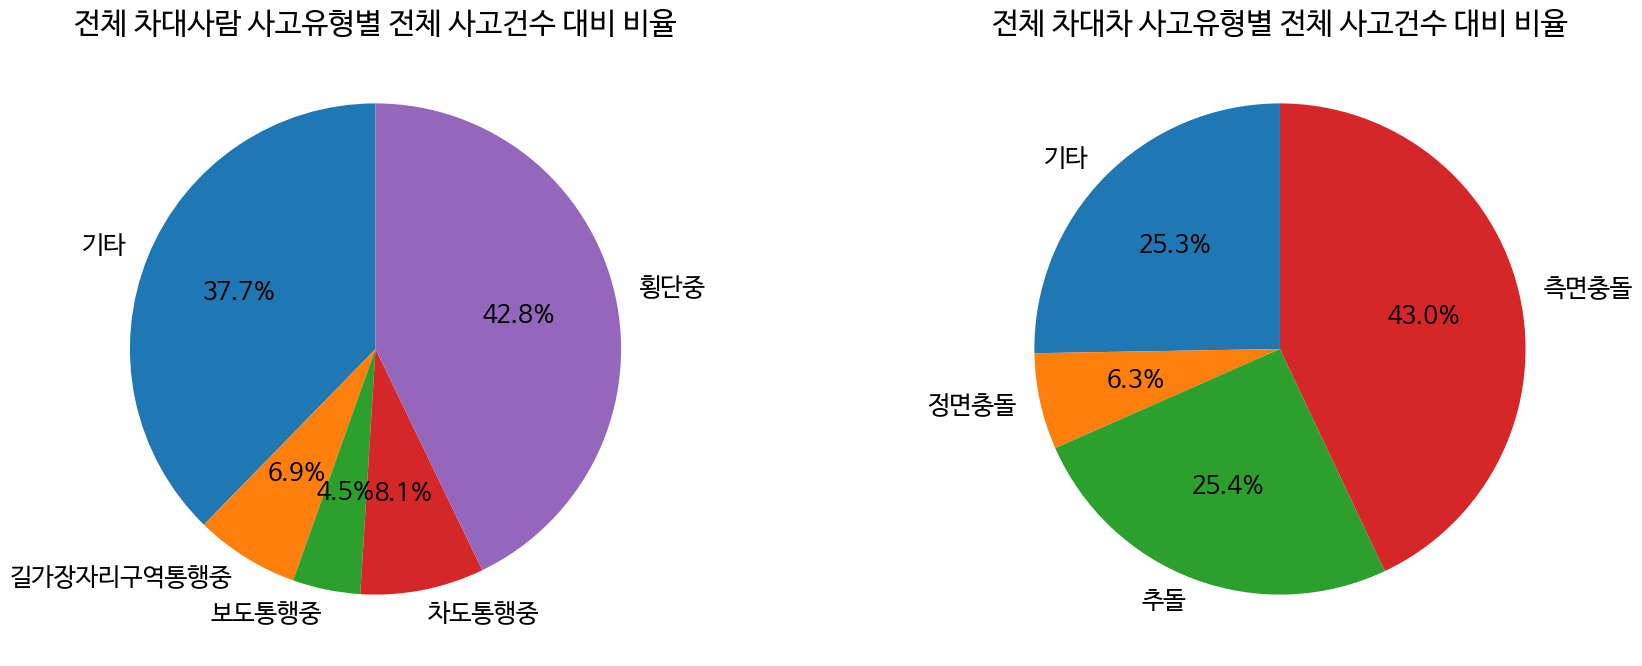

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# CSV 파일 경로 설정
csv_dir = '/content/drive/MyDrive/교통사고유형/'

# 파일 패턴 설정
file_pattern = '사고20*.csv'  # 2012부터 2020까지 파일에 매칭됨

# 빈 데이터프레임 리스트 생성
dataframes = []
ydf = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

# 파일 패턴과 일치하는 CSV 파일 목록 가져오기
csv_files = glob.glob(f'{csv_dir}/{file_pattern}')

# 각 파일을 순회하면서 데이터프레임 생성 및 리스트에 추가
for csv_file in csv_files:
    df = pd.read_csv(csv_file, encoding='cp949')
    dataframes.append(df)

# 각 연도별로 데이터를 합치기
combined_dataframes = []
for i in range(0, 8, 1):
    bdf = pd.concat(dataframes[i:(i+1)], ignore_index=True)
    combined_dataframes.append(bdf)

# 전체 데이터프레임에서 차대사람과 차대차 사고유형별 전체 사고건수 대비 비율 계산
total_adf = pd.concat(combined_dataframes, ignore_index=True)

# ax로 프레임 만들기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(19, 7))

# 차대사람 사고유형별 사고건수 비교
bdf = total_adf[total_adf['사고유형_대분류'] == '차대사람']
pie_data = bdf.groupby('사고유형_중분류')['사고건수'].sum()
axes[0].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('전체 차대사람 사고유형별 전체 사고건수 대비 비율')

# 차대차 사고유형별 사고건수 비교
bdf = total_adf[(total_adf['사고유형_대분류'] == '차대차') & (total_adf['사고유형_중분류'] != '후진중충돌')]
pie_data = bdf.groupby('사고유형_중분류')['사고건수'].sum()
axes[1].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('전체 차대차 사고유형별 전체 사고건수 대비 비율')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


# 도로교통 공단의 교통사고 가해자 연령 통계

경찰청 시간대별 사고건수


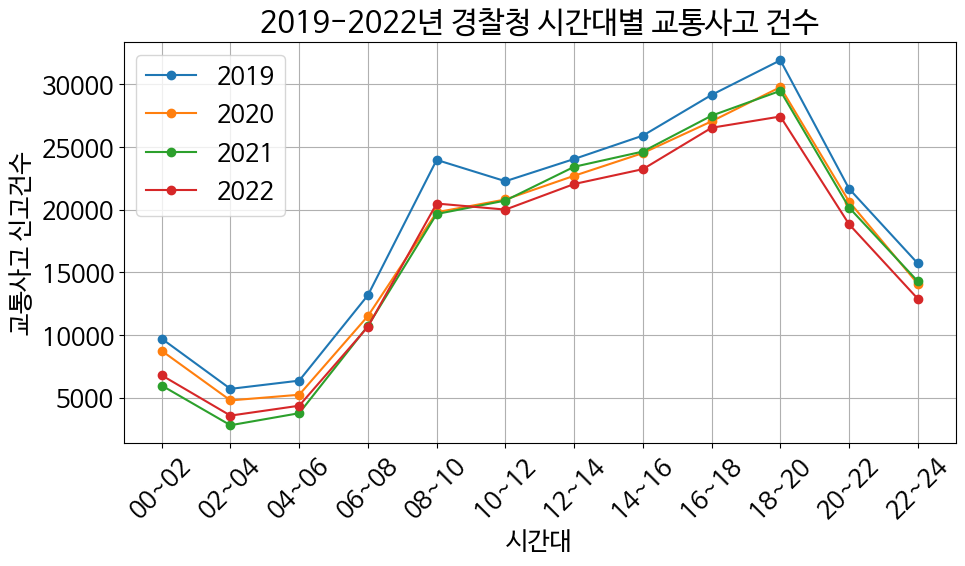

In [ ]:
import matplotlib.pyplot as plt

hdf = pd.read_csv('/content/drive/MyDrive/시간별 교통사고/경찰청_시간대별 교통사고 건수.csv')

# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(hdf['시간대'], hdf['2019'], marker='o', label='2019')
plt.plot(hdf['시간대'], hdf['2020'], marker='o', label='2020')
plt.plot(hdf['시간대'], hdf['2021'], marker='o', label='2021')
plt.plot(hdf['시간대'], hdf['2022'], marker='o', label='2022')

plt.xlabel('시간대')
plt.ylabel('교통사고 신고건수')
plt.title('2019-2022년 경찰청 시간대별 교통사고 건수')
plt.xticks(rotation=45)  # x축 레이블 45도 회전
plt.legend()
plt.grid(True)

plt.tight_layout()

# 그래프 표시
plt.show()


2021년도 시간대별 교통사고

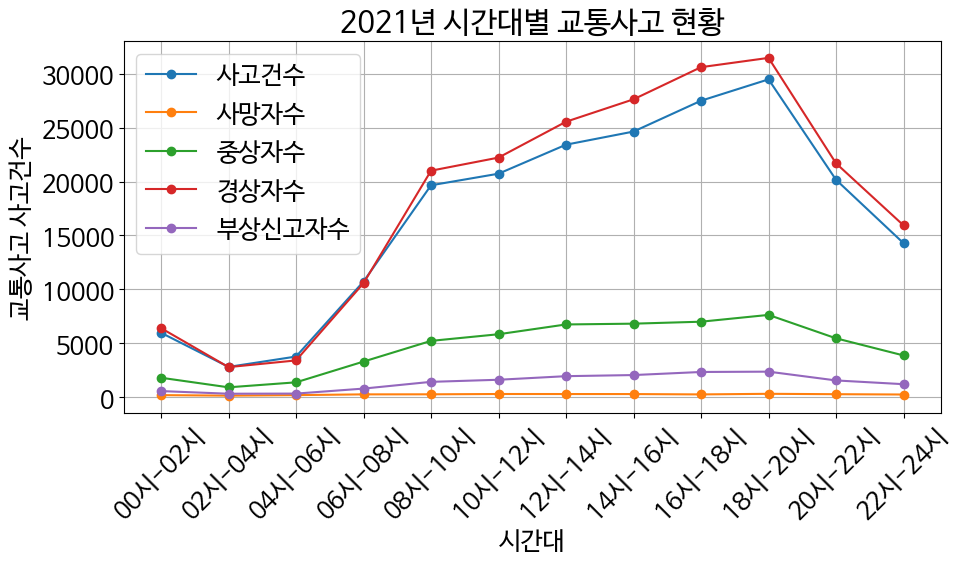

In [ ]:
import matplotlib.pyplot as plt

tdf2021 = pd.read_csv('/content/drive/MyDrive/시간별 교통사고/도로교통공단_시간대별 교통사고(2021).csv',encoding='CP949')

plt.figure(figsize=(10, 6))

plt.plot(tdf2021['시간대'],tdf2021['사고건수'], marker='o', label='사고건수')
plt.plot(tdf2021['시간대'],tdf2021['사망자수'], marker='o', label='사망자수')
plt.plot(tdf2021['시간대'],tdf2021['중상자수'], marker='o', label='중상자수')
plt.plot(tdf2021['시간대'],tdf2021['경상자수'], marker='o', label='경상자수')
plt.plot(tdf2021['시간대'],tdf2021['부상신고자수'], marker='o', label='부상신고자수')

plt.xlabel('시간대')
plt.ylabel('교통사고 사고건수')
plt.title('2021년 시간대별 교통사고 현황')
plt.xticks(rotation=45)  # x축 레이블 45도 회전
plt.legend()
plt.grid(True)

plt.tight_layout()

# 그래프 표시
plt.show()
